## Load graphs, bulk matrices and remove dummy nodes, rows cols.

In [20]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [88]:
import os
import sys
sys.path.append("/home/rohit/PhD_Work/GM_my_version/Graph_matching/")
from sklearn.cluster import KMeans
import networkx as nx
import numpy as np
from graph_generation.load_graphs_and_create_metadata import dataset_metadata
from graph_matching_tools.metrics import matching
import matplotlib.pyplot as plt
import scipy.io as sio
import tools.graph_processing as gp
import pickle
import tools.graph_visu as gv
import tools.clusters_analysis as gca
import seaborn as sns
import pandas as pd
from matplotlib.pyplot import figure
import slam.io as sco


In [22]:
path_realdata = '../data/Oasis_original_new_with_dummy/'
path_nondummy = '../data/Oasis_original_new_renamed/modified_graphs/'

In [23]:
X_mALS_dummy = sio.loadmat(path_realdata +'/X_mALS.mat')['X']

In [24]:
def remove_dummy_rowcol_X(bulk_X, graphs):
    
    dummy_mask = [list(nx.get_node_attributes(graph,'is_dummy').values()) for graph in graphs]
    dummy_mask = sum(dummy_mask,[])
    dummy_indexes = [i for i in range(len(dummy_mask)) if dummy_mask[i]==True]     
    
    bulk_X = np.delete(bulk_X,dummy_indexes,0) # delete the dummy rows
    bulk_X = np.delete(bulk_X,dummy_indexes,1) # delete the dummy columns
    
    return bulk_X

In [25]:
all_graphs = gp.load_graphs_in_list(path_realdata + '/labelled_graphs')

#load non dummy graphs
all_graphs_non_dummy = gp.load_graphs_in_list(path_nondummy)
sizes = [len(g) for g in all_graphs_non_dummy]

In [26]:
X_mALS = remove_dummy_rowcol_X(X_mALS_dummy,all_graphs)

## Retrieve matched nodes and depth values

In [27]:
all_graphs[0].nodes.data()[0]

{'vertex_index': 1357,
 'sphere_3dcoords': array([  6.50138903, -93.98175049, -33.54344177]),
 'sphere_coords': [-1.5017292499542236, 1.9128626585006714],
 'basin_label': 307.0,
 'basin_area': 447.01047,
 'depth': -0.18439683,
 'basin_thickness': 2.5869646072387695,
 'ico100_7_vertex_index': 7574,
 'label_neuroimage': 28,
 'label_media': 90,
 'sphere_3dcoords_noreg': array([ 17.402021, -91.770744, -35.71135 ], dtype=float32),
 'ico100_7_vertex_index_noreg': 11492,
 'is_dummy': False,
 'labelling_kerGM': 0.6726961301647116,
 'labelling_mALS': 0.6726961301647116,
 'labelling_mSync': 0.6726961301647116,
 'labelling_CAO': 0.2269832262372122,
 'labelling_MatchEig': 0.6726961301647116}

In [28]:
def create_clusters_lists(list_graphs, label_attribute="label_dbscan"):
    """
    Given a list of graphs, return a list of list that represents the clusters.
    Each inside list represent one cluster and each elemnt of the cluster is
    a tuple (graph_number, node_in_the_graph).
    """

    result_dict = {}
    label_depths = {}

    for i_graph, graph in enumerate(list_graphs):
        for node in graph.nodes:
            if not graph.nodes[node]["is_dummy"]:
                label_cluster = graph.nodes[node][label_attribute]
                
                if label_cluster in result_dict:
                    
                    #retrieve depth of the corresponding label in that graph
                    depth_value = graph.nodes[node]['depth']
                    
                    result_dict[label_cluster].append((i_graph, node))
                    label_depths[label_cluster].append(depth_value)
                    
                else:
                    #retrieve depth of the corresponding label in that graph
                    depth_value = graph.nodes[node]['depth']
                    
                    result_dict[label_cluster] = [(i_graph, node)]
                    label_depths[label_cluster] = [depth_value]


    return result_dict,label_depths

In [40]:
def create_depth_boxplot_matching(method_label='labelling_mSync'):
    
    cluster_dict, depth_dict = create_clusters_lists(all_graphs, label_attribute = method_label)
    
    depth_all = []
    for k in depth_dict.keys():
        
        depth_all.append(depth_dict[k])
    plt.boxplot(depth_all,patch_artist=True)
    plt.xlabel(method_label,fontsize = 20)
    plt.ylabel('Depth',fontsize = 20)
    plt.show()

In [41]:
# cluster_dict, depth_dict = create_clusters_lists(all_graphs, label_attribute='labelling_mSync')

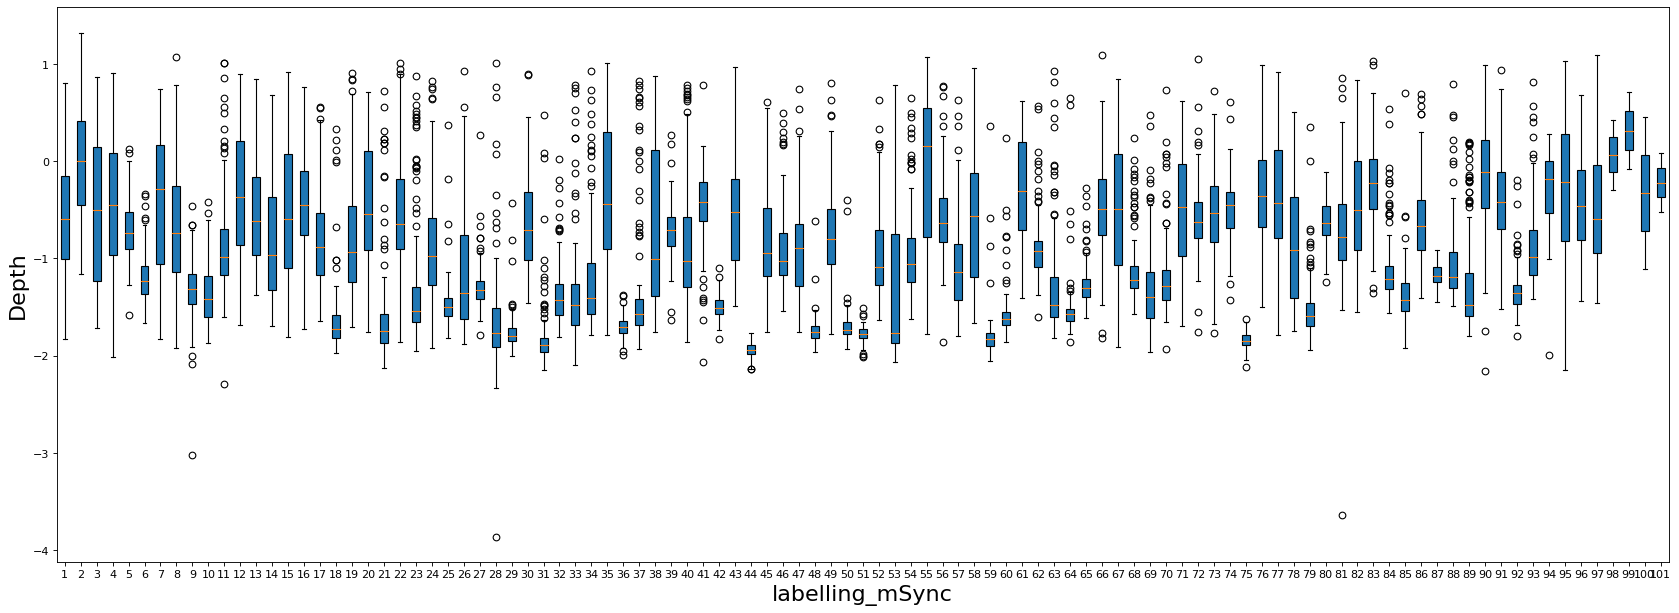

In [42]:
figure(figsize=(26, 9), dpi=80)
create_depth_boxplot_matching(method_label='labelling_mSync')

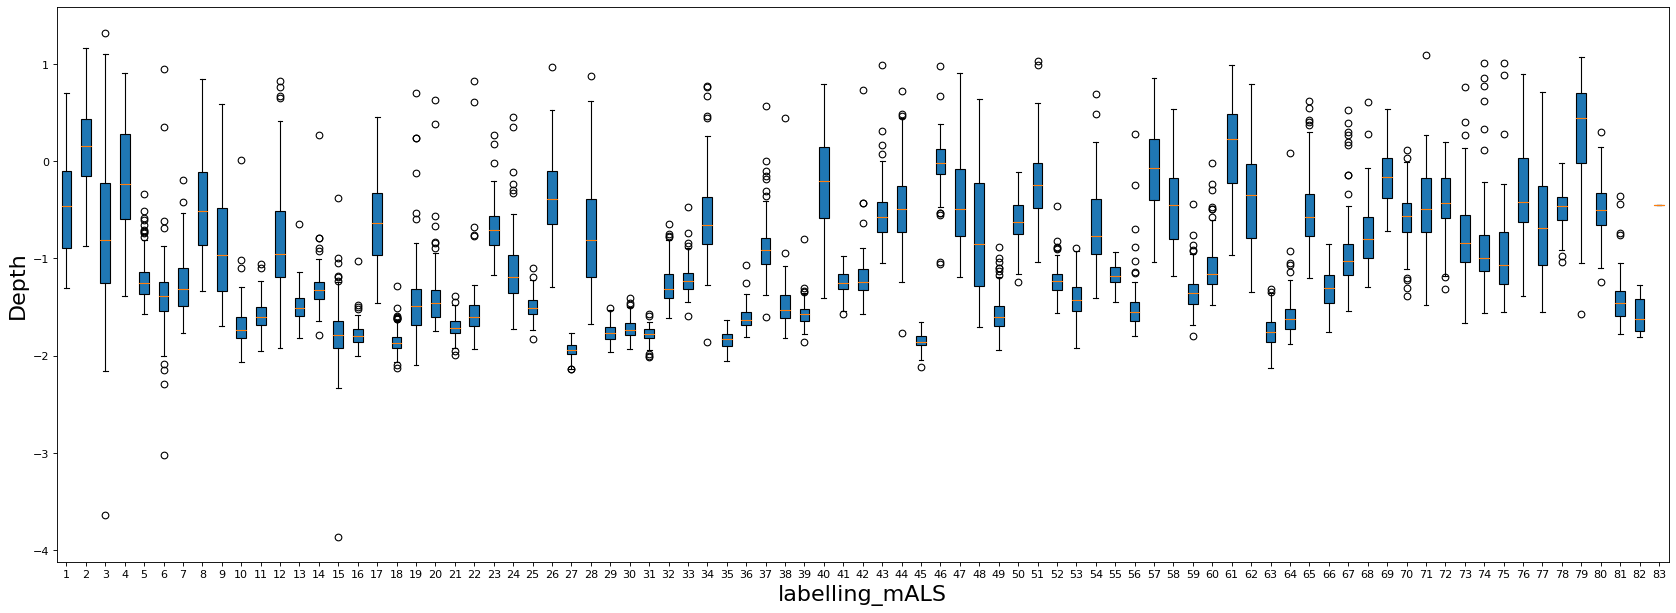

In [43]:
figure(figsize=(26, 9), dpi=80)
create_depth_boxplot_matching(method_label='labelling_mALS')

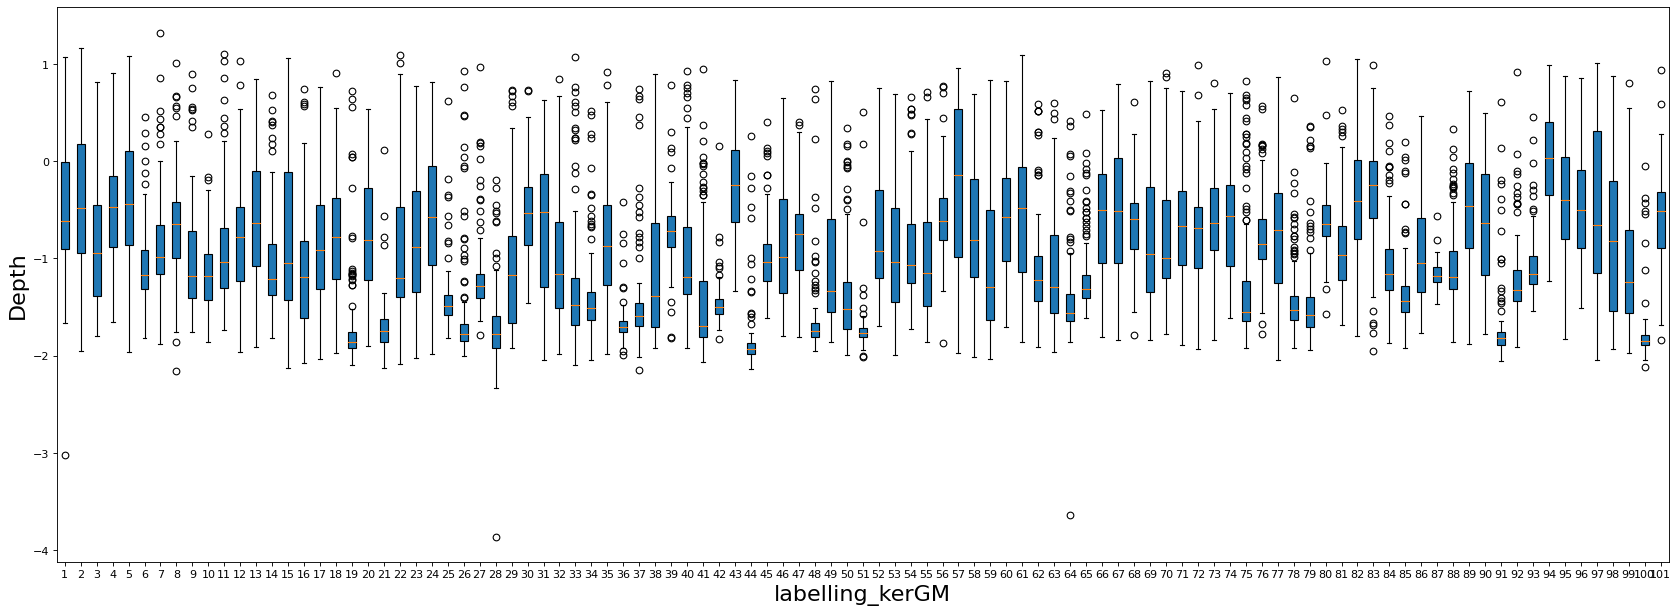

In [44]:
figure(figsize=(26, 9), dpi=80)
create_depth_boxplot_matching(method_label='labelling_kerGM')

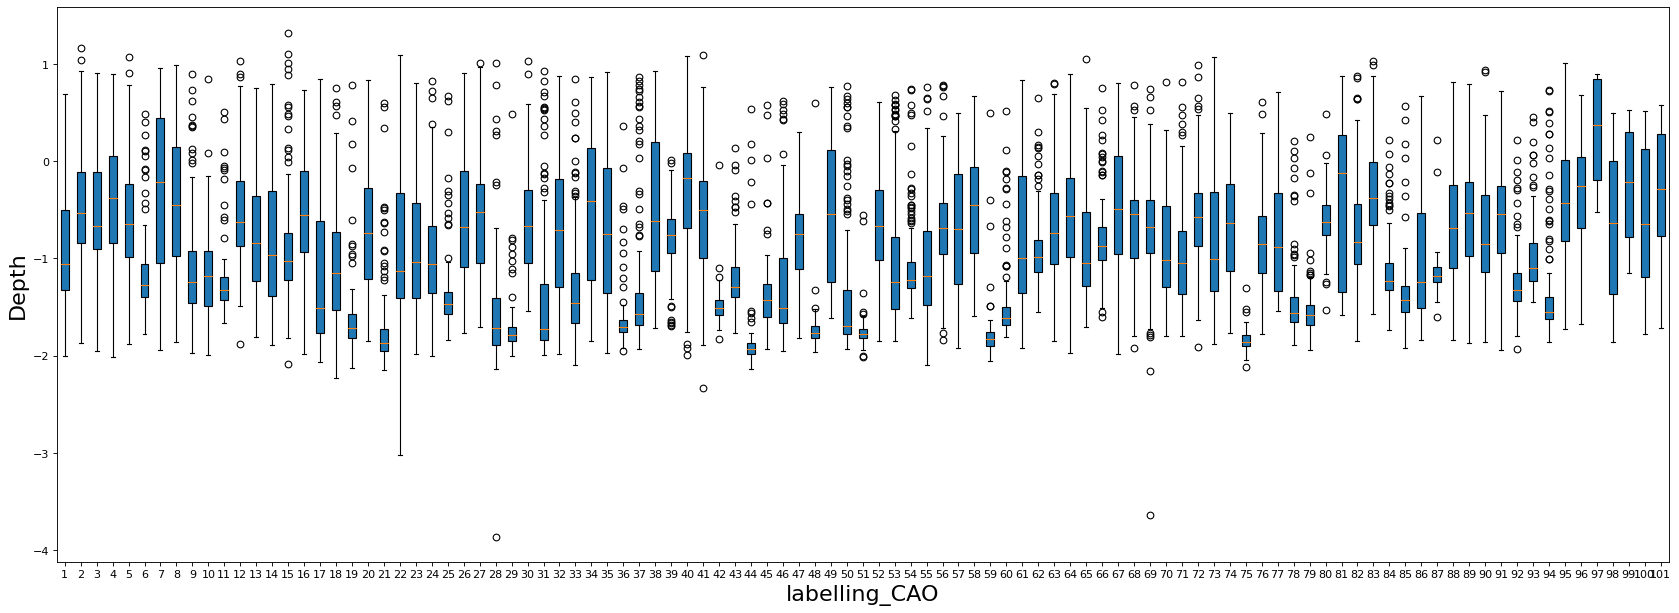

In [45]:
figure(figsize=(26, 9), dpi=80)
create_depth_boxplot_matching(method_label='labelling_CAO')

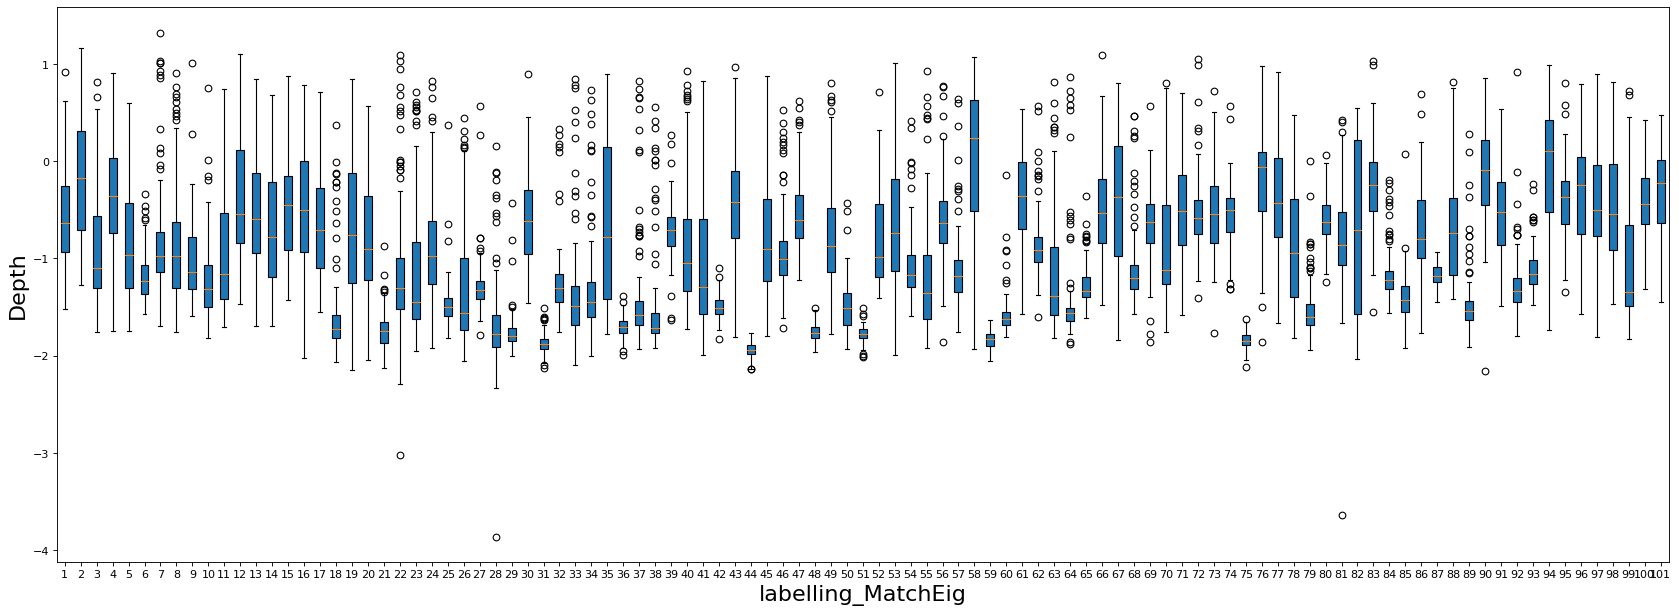

In [46]:
figure(figsize=(26, 9), dpi=80)
create_depth_boxplot_matching(method_label='labelling_MatchEig')

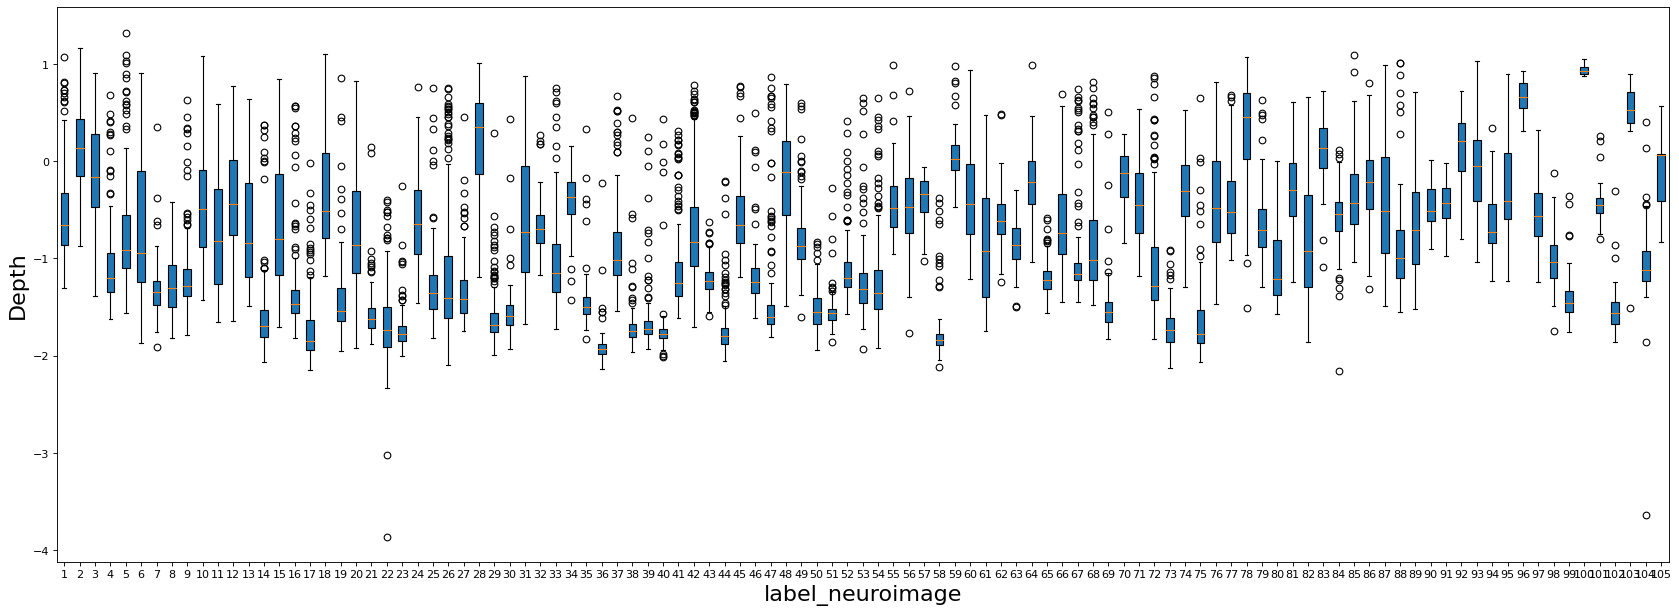

In [47]:
figure(figsize=(26, 9), dpi=80)
create_depth_boxplot_matching(method_label='label_neuroimage')

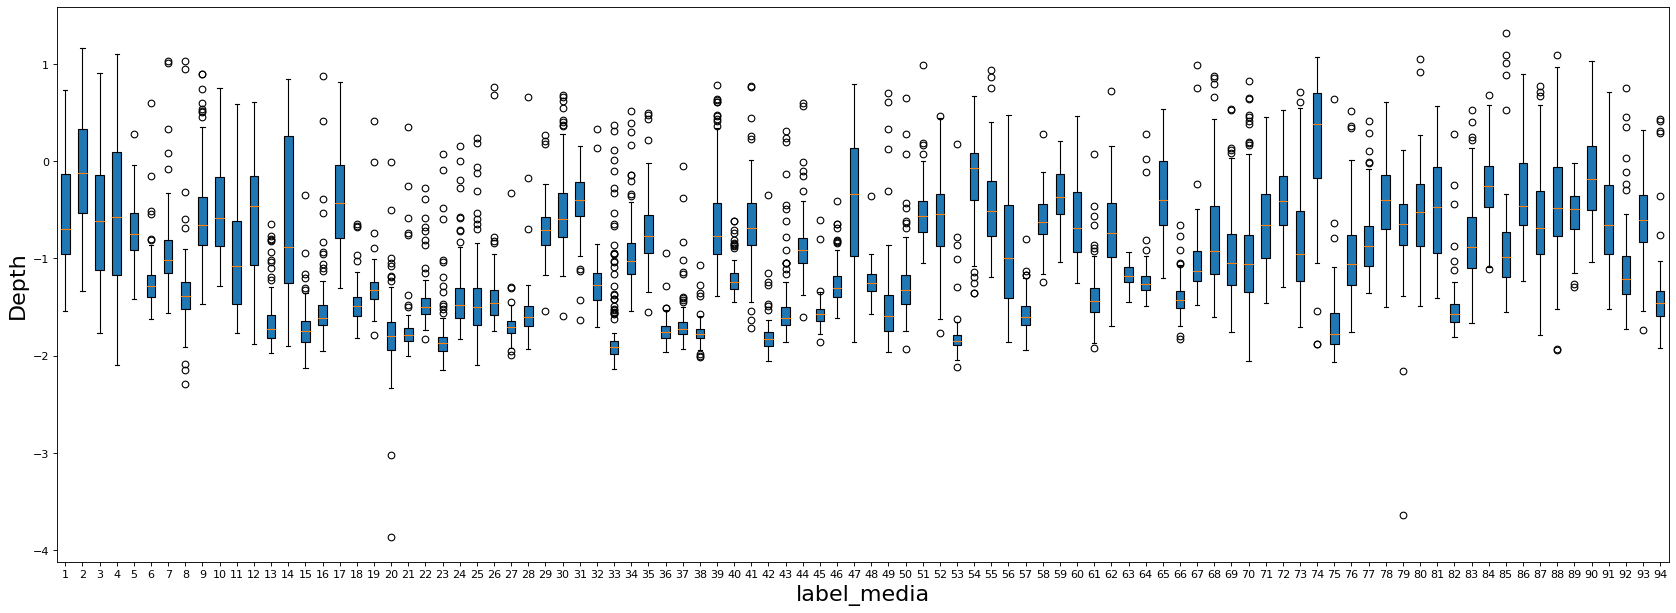

In [49]:
figure(figsize=(26, 9), dpi=80)
create_depth_boxplot_matching(method_label='label_media')

In [51]:
cluster_dict, depth_dict = create_clusters_lists(all_graphs, label_attribute = "labelling_mALS")

In [59]:
labs = list(depth_dict.keys())

In [76]:
pos = np.array([[ 70.17031106,-14.33412922,-8.66941023],
 [ 69.4148713,-25.36553229,-5.92394399],
 [ 41.25712594,19.96847259,8.72146845],
 [ 63.45065316,3.25152313,-12.72472143]])

In [81]:
centroid_dict = gca.get_centroid_clusters(all_graphs, cluster_dict, coords_attribute="sphere_3dcoords")

In [91]:
# template_mesh = '../data/template_mesh/OASIS_avg.lh.white.talairach.reg.ico7.inflated.gii'
# mesh = gv.reg_mesh(sco.load_mesh(template_mesh))
# centroids_3Dpos = gca.get_centroids_coords(centroid_dict, all_graphs, mesh, attribute_vertex_index='ico100_7_vertex_index')

In [92]:
centroid_dict

{0.6726961301647116: (62, 0),
 0.3119287115852154: (8, 0),
 -0.1: (62, 11),
 0.8893209701421761: (136, 2),
 0.055688767098739926: (19, 4),
 0.6164804022678066: (103, 5),
 0.5614567581322376: (119, 5),
 0.7943269487351451: (0, 12),
 0.48756164187770873: (56, 10),
 0.8123777065116572: (14, 17),
 0.676948807071108: (59, 11),
 0.879479847512742: (61, 26),
 0.5376379964782969: (16, 29),
 0.28967332925889594: (14, 13),
 0.956799027313698: (41, 21),
 0.5231860053967116: (90, 21),
 0.4138627359340204: (26, 18),
 0.10724284164059948: (5, 27),
 0.14089778101056666: (66, 31),
 0.47202666338410043: (4, 33),
 0.4268140228599365: (73, 32),
 0.14530038512270013: (125, 42),
 0.934420173068373: (103, 33),
 0.34624582944718796: (134, 45),
 0.7463879013047687: (88, 29),
 0.08808419206999264: (114, 23),
 0.1394140629535513: (50, 40),
 0.9902420032915399: (62, 34),
 0.534174322248884: (98, 52),
 0.9071235831731352: (126, 46),
 0.24494498841631557: (97, 44),
 0.7657930259099077: (55, 45),
 0.536859911142603

In [93]:
depth_dict_var = {}

for k in depth_dict:
    mean_var = np.std(depth_dict[k])
    depth_dict_var[k] = mean_var

In [98]:
pos

array([[ 70.17031106, -14.33412922,  -8.66941023],
       [ 69.4148713 , -25.36553229,  -5.92394399],
       [ 41.25712594,  19.96847259,   8.72146845],
       [ 63.45065316,   3.25152313, -12.72472143]])

In [101]:
0*np.ones(pos.shape[0],)

array([0., 0., 0., 0.])